## bagging


In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import numpy as np
X,y = make_moons(n_samples=500,noise=0.25,random_state =3);
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=42)

bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_y_pred = dt_clf.predict(X_test)


In [8]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [9]:
dt_y_pred

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [14]:
y_pred == dt_y_pred

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [13]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,
                           bootstrap=True,n_jobs=-1,oob_score=True)

In [15]:
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9333333333333333

In [16]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.904

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

Xm,ym = make_moons(n_samples=200, noise =0.3, random_state=2)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(
Xm,ym,stratify=ym, random_state=42)

In [59]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5
                           ,n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=5, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

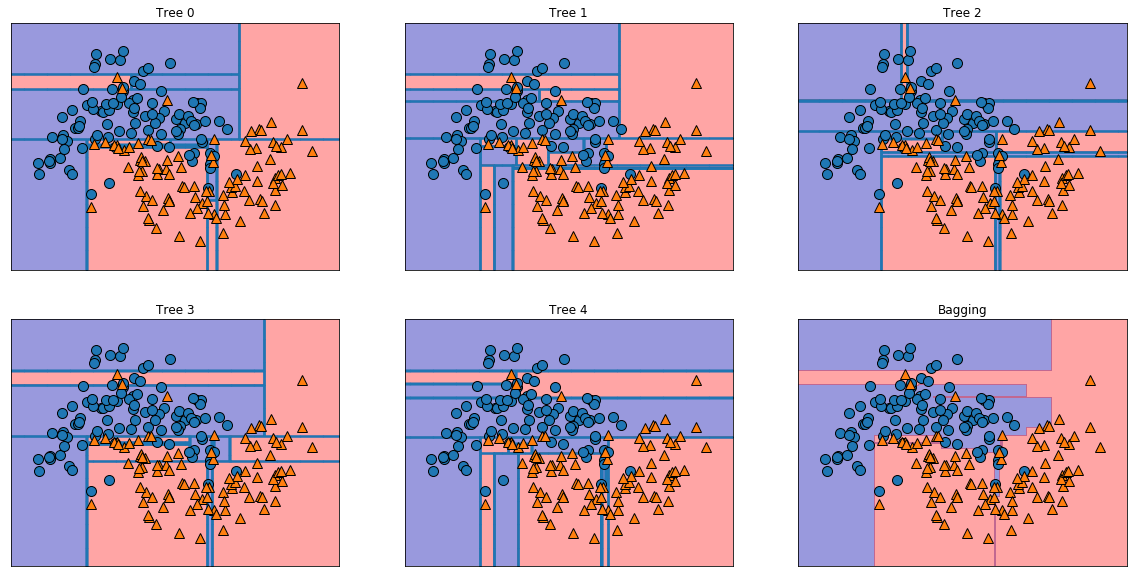

In [60]:
import matplotlib.pyplot as plt
import mglearn

fig, axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1], ym)


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)
rnd_clf.fit(iris["data"],iris["target"])
for name, importance in zip(iris["feature_names"],rnd_clf.feature_importances_):
    print(name,"=",importance)

sepal length (cm) = 0.11249225099876374
sepal width (cm) = 0.023119288282510326
petal length (cm) = 0.44103046436395765
petal width (cm) = 0.4233579963547681


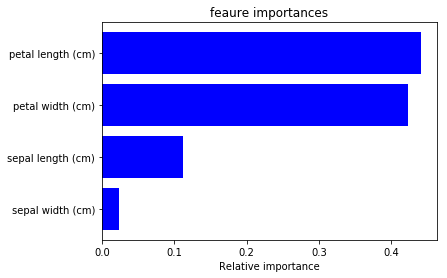

In [63]:
feature =iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title("feaure importances")
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[feature[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

In [65]:
import matplotlib.pyplot as plt
import mglearn

forest = RandomForestClassifier(n_estimators=5,max_feature=1,random_state=2)
forest.fit(Xm_train,ym_train)

fig, axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)

mglearn.plots.plot_2d_separator(forest,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("Bagging")
mglearn.discrete_scatter(Xm[:,0],Xm[:,1], ym)



TypeError: __init__() got an unexpected keyword argument 'max_feature'